In [92]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#import our random data 
df = pd.read_csv('./troop_movements.csv')

In [10]:
# Create grouped data showing counts of empire vs resistance.

print(df.groupby('empire_or_resistance')['empire_or_resistance'].count())


empire_or_resistance
empire        475
resistance    525
Name: empire_or_resistance, dtype: int64


In [32]:
# Create grouped data showing counts of characters by homeworld
print(df.groupby('homeworld')['homeworld'].count())

homeworld
Alderaan        21
Aleen Minor     17
Bestine IV      20
Cerea           24
Champala        21
Chandrila       29
Concord Dawn    19
Corellia        26
Dagobah         36
Dathomir        21
Dorin           20
Eriadu          23
Glee Anselm     24
Haruun Kal      18
Iktotch         37
Iridonia        25
Kalee           22
Kashyyyk        22
Malastare       19
Mirial          22
Mon Cala        28
Muunilinst      28
Naboo           26
Ojom            14
Quermia         13
Rodia           39
Ryloth          19
Serenno         25
Shili           31
Skako           21
Socorro         34
Stewjon         23
Sullust         27
Tatooine        27
Tholoth         16
Toydaria        26
Trandosha       23
Troiken         24
Tund            24
Umbara          24
Vulpter         25
Zolan           17
Name: homeworld, dtype: int64


In [11]:
# Created grouped data showing counts of characters by unit_type.

print(df.groupby('unit_type')['unit_type'].count())

unit_type
at-at                 110
at-st                 136
resistance_soldier    128
stormtrooper          131
tie_fighter           125
tie_silencer          122
unknown               134
x-wing                114
Name: unit_type, dtype: int64


In [12]:
#Engineer a new feature called is_resistance with a True or False value based on empire_or_resiatance.

#function to check if isResistance
def is_resistance(x):
    if x == 'resistance':
        return True
    else:
        return False
    
df['is_resistance'] = df['empire_or_resistance'].apply(is_resistance)
print(df)

               timestamp  unit_id     unit_type empire_or_resistance  \
0    2023-10-10 09:54:43        1         at-st               empire   
1    2023-10-10 09:54:42        2       unknown           resistance   
2    2023-10-10 09:54:41        3        x-wing               empire   
3    2023-10-10 09:54:40        4       unknown           resistance   
4    2023-10-10 09:54:39        5        x-wing               empire   
..                   ...      ...           ...                  ...   
995  2023-10-10 09:38:08      996  tie_silencer           resistance   
996  2023-10-10 09:38:07      997  tie_silencer           resistance   
997  2023-10-10 09:38:06      998        x-wing           resistance   
998  2023-10-10 09:38:05      999  stormtrooper           resistance   
999  2023-10-10 09:38:04     1000  stormtrooper               empire   

     location_x  location_y  destination_x  destination_y   homeworld  \
0             2           2              9              1     

[Text(0.5, 0, 'Empire or Resistance'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Character Count by Empire or Resistance')]

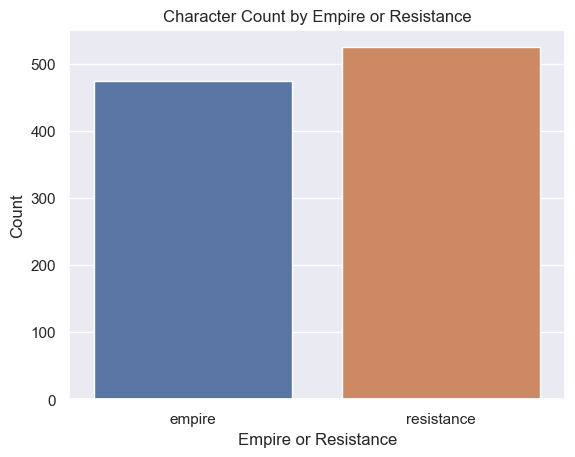

In [28]:
sns.set()
#df.groupby('empire_or_resistance')['empire_or_resistance'].count()
#cdf = df.groupby('empire_or_resistance')['empire_or_resistance'].rename(name= 'Count')
cdf = df['resistance_empire_count'] = df.groupby('empire_or_resistance')['empire_or_resistance'].count() 
allegiance_count = sns.barplot(x = cdf.index, y = cdf.values)
allegiance_count.set(xlabel = 'Empire or Resistance', ylabel = 'Count', title = 'Character Count by Empire or Resistance')


In [101]:
X = df[['unit_type', 'homeworld']]
y = df['empire_or_resistance']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


filename = 'trained_model.pkl'


with open(filename, 'wb') as file:
    pickle.dump(model, file)


<Axes: xlabel='Importance', ylabel='Feature'>

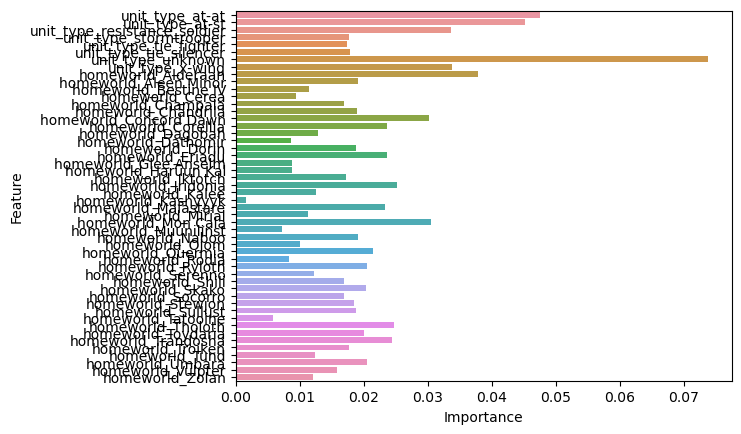

In [100]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance' : importances})

sns.barplot(feature_importances, x='Importance', y='Feature')

In [98]:
%%sh
ls


Starwars Data Worksheet (Elijah-Branch).ipynb
Starwars Data Worksheet (Main).ipynb
generate_data.py
home_worlds.json
model.pkl
troop_movements.csv
